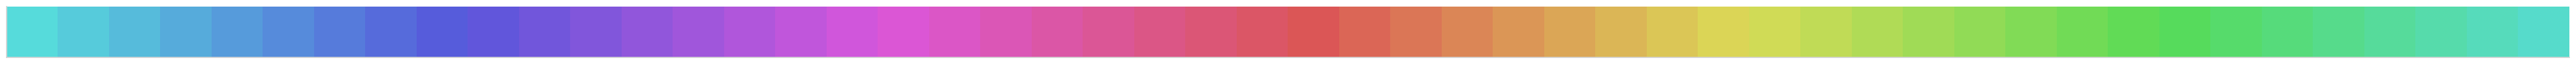

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
import numpy as np
import time

sns.set(font='serif',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.grid':False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
plt.rcParams["figure.figsize"] = (24,15)

colors = sns.hls_palette(50, h=0.5)
sns.palplot(colors)
sns.set_palette(colors)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("modelcomparison.csv")

In [ ]:
df

,Model (Including variations),Parameters,Hidden State Size,Layers,Attention Heads,Main association,Availability,Paper publication date
0,Encoder Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BERT,110M - 340M,768 - 1024,12 - 24,12 - 16,Google,Open - Model versions available,2018-10-11
2,ALBERT,11M - 223M,768 - 4096,12 - 24,12 - 64,Google,Open - Model versions available,2019-09-26
3,DistilBERT,66M,768,6,12,HuggingFace,Open - Model versions available,2019-10-02
4,ELECTRA,110M - 335M,256 - 1024,12 - 24,4 - 16,Google,Open - Model versions available,2020-03-23
5,RoBERTa,125M - 355M,768 - 1024,12 - 16,12 - 16,Meta,Open - Model versions available,2019-07-26
6,LUKE,483M,1024,24,16,Studio Ousia,Open - Model versions available,2020-10-02
7,Decoder Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GPT,110M,768,12,12,OpenAI,Open - Model versions available,2018-06-10
9,GPT2,117M - 1542M,768 - 1600,12 - 48,12 - 25,OpenAI,Open - Model versions available,2019-07-28


In [ ]:
def tonum(x):

  try:
    t = []

    for i in x:
      i = i.strip()
      vals = {"M":1000000,
              "B":1000000000,
              "T":1000000000000}
      suff = i[-1]

      t.append(float(i[:-1]) * vals[suff])
    return t
  except Exception as e:
    return np.nan


df["params"] = df["Parameters"].str.split("-").apply(tonum)

In [ ]:
df["Year"] = pd.to_datetime(df["Paper publication date"])

In [ ]:
def plot_model(model):
  name = model["Model (Including variations)"]
  params = model["params"]
  year = model["Year"]
  plt.plot([year for x in  params],params, "o--", markersize=3, alpha=0.6, label=name)
  plt.legend()

class ModelPlotter:
  def __init__(self):
    self.points = []
    self.names = []
    self.max_points = []


  def plot(self):
    plt.yscale("log")
    year_data = [x[0]/1000 for x in self.max_points]
    val_data = [np.log(x[1]) for x in self.max_points]
    z = np.polyfit(year_data , val_data, 1)

    fit = np.poly1d(z)
    years = []
    for p, name, i in zip(self.points, self.names, range(len(self.points))):
      years.append(p[0][0])
      plt.plot(p[0],p[1], "o--", markersize=3, alpha=0.8, label=f"{name} [{i}]")
      plt.annotate(i, (p[0][0], self.max_points[i][1]), xytext=(5, 5), textcoords="offset pixels", fontsize=10 )
    t = sorted(zip(years, year_data), key=lambda x: x[0])
    t_year , t_unix  = [x[0] for x in t], [x[1] for x in t]

    plt.plot(t_year, np.exp(fit(t_unix)))
    plt.xlabel("Paper publication date")
    plt.ylabel("Parameters")
    plt.title("Model parameter growth")
    plt.grid(color="black", linestyle = "--", alpha=0.2 )
    plt.legend()
  def add(self, model):
    name = model["Model (Including variations)"]
    params = model["params"]
    year = model["Year"]
    self.points.append(([year for x in  params],params))
    self.max_points.append((time.mktime(year.timetuple()), params[-1]))
    self.names.append(name)


In [ ]:
idx1 = df[df["Model (Including variations)"]=="Encoder Architecture"].index[0]
idx2 = df[df["Model (Including variations)"]=="Decoder Architecture"].index[0]
idx3 = df[df["Model (Including variations)"]=="Encoder-Decoder Architecture"].index[0]

encoders = df.iloc[idx1+1:idx2]
decoders = df.iloc[idx2+1:idx3]
encoderdecoder = df.iloc[idx3+1:]

In [ ]:
plotter = ModelPlotter()

In [ ]:
decoders.apply(plotter.add, axis=1)
encoders.apply(plotter.add, axis=1)
encoderdecoder.apply(plotter.add, axis=1)

25    None
26    None
dtype: object

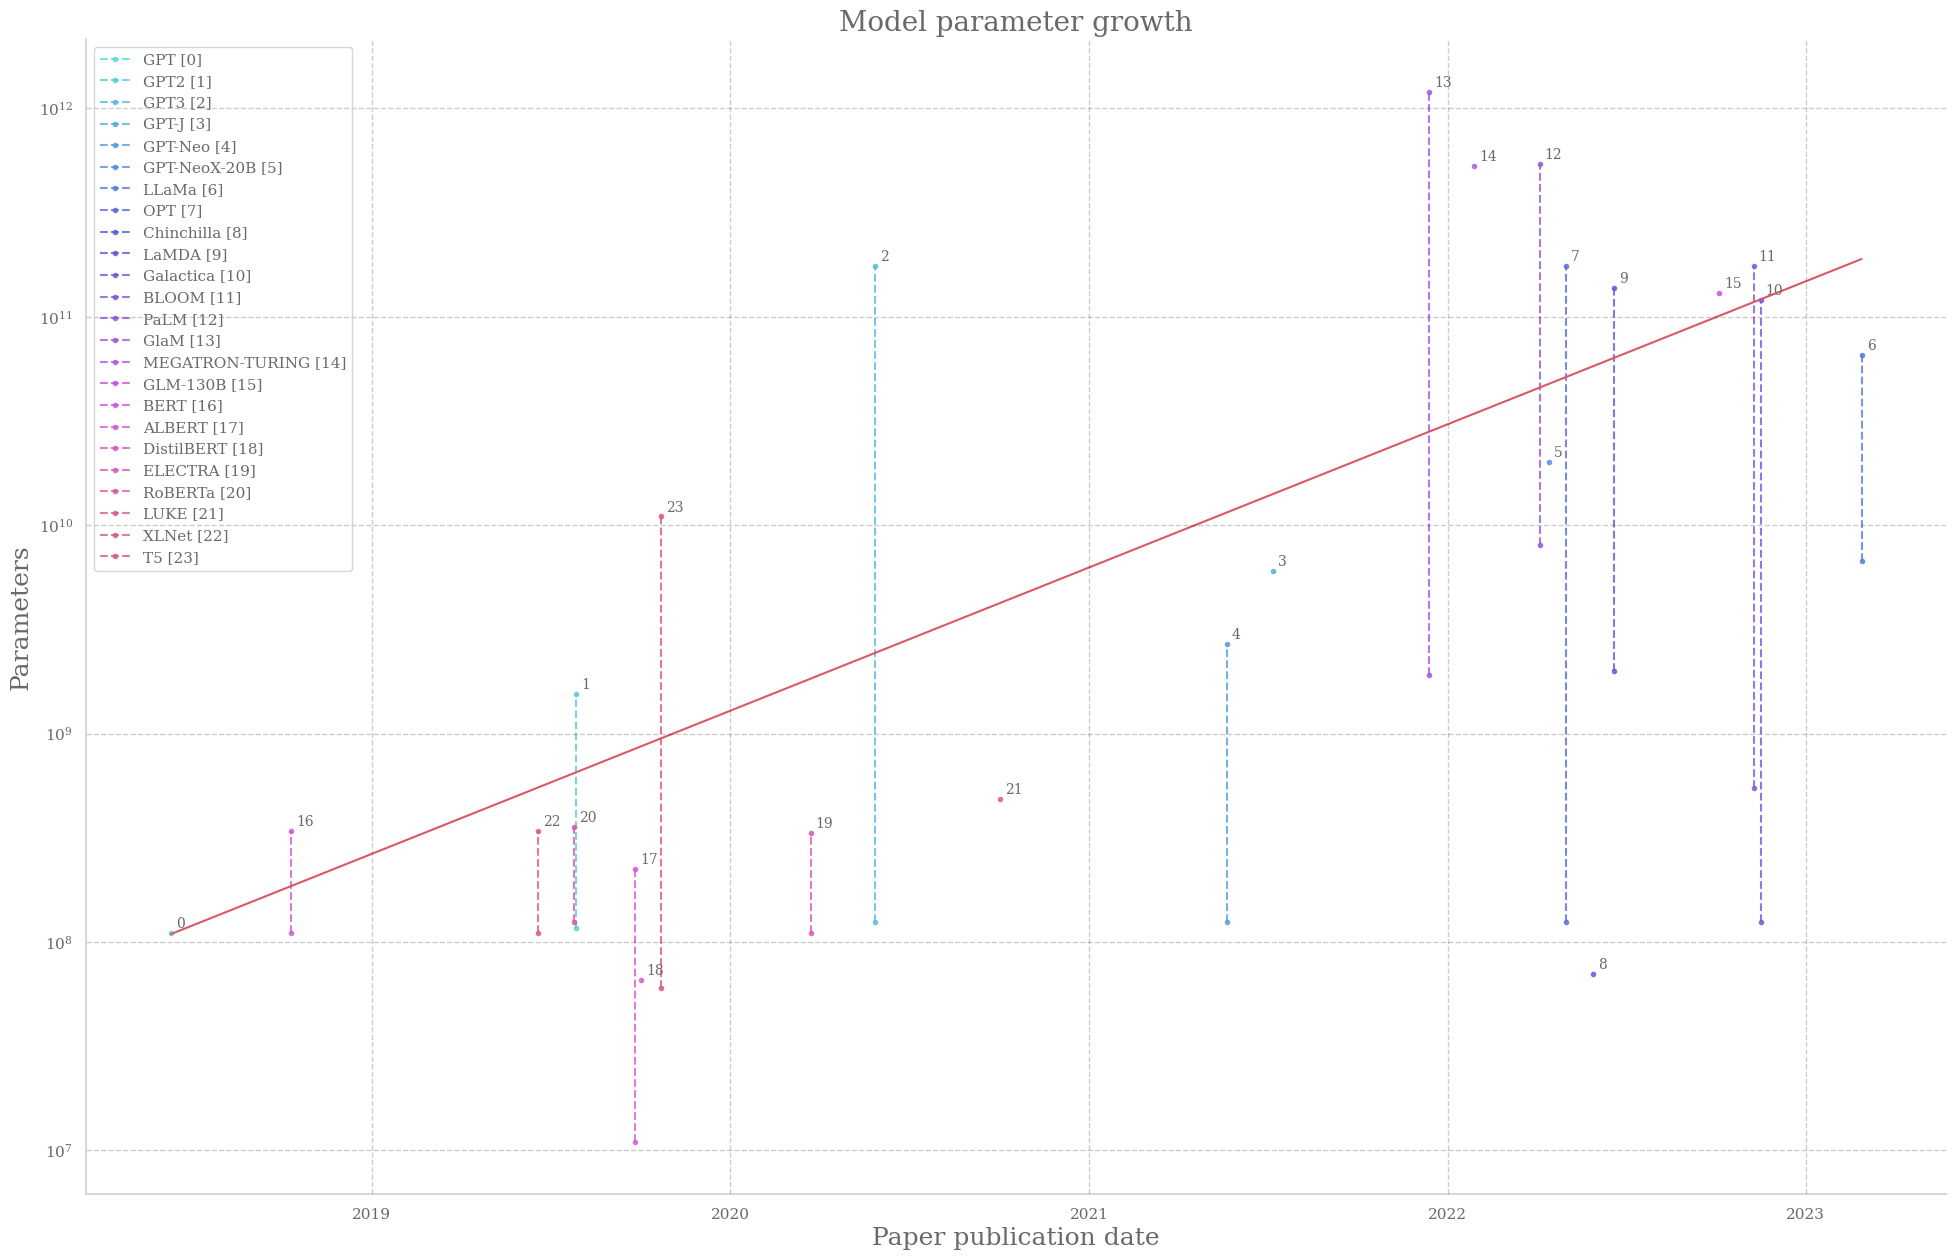

In [ ]:
plotter.plot()